## Final Project
### Fall 2019

This is a collaborative project by 4 team members. All members of the project share the credit and proprietary rights. I hided the rest of names in our group in this public depository.

### Import neccessary packages

In [34]:
from bokeh.models.annotations import Title
from bokeh.plotting import figure
from bokeh.layouts import layout, column, gridplot, widgetbox, row
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid, Div, Slider, Select, TextInput, RangeSlider, MultiSelect, CheckboxGroup, AutocompleteInput, Panel, Tabs, HoverTool
from bokeh.io import curdoc, output_file, show, output_notebook
from bokeh.models.layouts import LayoutDOM
from math import pi
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction
<br> 
For the final project, the team elected to have each member investigate and present a possible data set with which to work.  XXX presented a data set focused on recent IMDB films and television shows, XXX presented a data set focused on schools in the Commonwealth of Virginia, XXX presented a data set focused on the 2019 results of San Francisco’s Bay to Breakers race, and XXX presented a data set focused on current FIFA player statistics.  After much discussion, the team down-selected to XXX’s set on October 21st given its breadth (over 16,000 unique players), width (20 columns of data per player), and general appeal (the ubiquitous international popularity of soccer).  The team soon realized that the potential to determine the “best” squads of soccer players across various criteria could not only assist enthusiasts of the video game FIFA 20 (from which the data set was derived) in creating well-composed virtual squads, but could be further extended into the real world to estimate the “best” 
squads by field configuration, then by categories like country, continent, professional league, and so forth.
<br> 
<br> 
In conceiving a program that would allow users the ability to choose such “best” squads across such diverse criteria, the question that naturally emerged was: could we have beaten the octopus?  As many may have remembered, in 2010 Paul the Octopus gained global acclaim due to the perceived accuracy of his prognostications concerning the results of World Cup matches.  While Paul the Octopus is sadly no longer with us, the spirit of predicting the outcomes of soccer matches is still very much relevant particularly in the sports-betting world.  Having a program that extracts, reads in, and processes current soccer player data could be considered a useful tool for attempting to do such a thing.
<br> 
<br>
It’s noted that to keep the scope of this project limited, the team is only considering active players in the FIFA 20 data set as given by all gold,, silver, and bronze players. For example, the first page of gold players are listed as: https://www.futbin.com/20/players?page=1&sort=Player_Rating&order=desc&version=gold.  It is also assumed that players can be classified as attacker, midfielder, defender, or goal keeper irrespective of specific positions thereof.  Finally, in predicting the “best” squads, the team assumed that all players belonging to a particular data subset would be available to form such a squad (that is, all squads formed are “ideal” based on current player statistics and rankings, and ignores player injuries, red card status, decisions to sit out, and so forth).
<br> 
<br> 
Beyond developing such a predictive tool, the team also hoped to be able to demonstrate the relationship between various player statistic categories and to be able to make direct, detailed comparisons between players across such categories.  The final intent was to make the tool interactive, intuitive, and visual for the user, which allowed the team an opportunity to gain more experience in using Python libraries like bokeh and seaborn.


## About the data
<br>BeautifulSoup was used to scrape the data from https://www.futbin.com/20/players?page=1&sort=Player_Rating&order=desc&version=gold, a site dedicated to enthusiasts of the FIFA video game series.  In particular, the team elected to focus on player data from the most recent entry in the series, FIFA 20, as this represents current, comprehensive stats for nearly 16,750 FIFA players.  This data includes categories like **name, club, country, league, overall rating, position, skill, weak foot, work rate, pace, shooting (rating), passing (rating), dribbling (rating), defending (rating), physicality (rating), height, base stats, and in-game stats**.   The team subsequently added a category of continent (determined based on the player’s country) and further sub-categorized the players as **attacker, midfielder, defender, and goal keeper** based on the position value.

## Results

We have used pie charts, box plots, bar plots to graphically display our findings. For example, we learned that some countries have abundant good soccer players, and some countries have limited amount of players. We learned that certain physical attributes are more important for certain type of players. A good example is that goalies are usually tall players. Very importantly, we implemented graphical user interaction, and users can extract their desired information easily by a few mouse clicks. By the way, one of user story was which country has the best team, i.e. in our attempt to beat Paul the Octopus. The best team, based on the "Overall rating", is Spain, and the second best team is France. Considering France won the world cup last year, and Spain won it in 2010, we might have a good chance against Paul! 


In [35]:
# Read in csv file
fifa = pd.read_csv('FIFA Player Info.csv', keep_default_na = False)
fifa = fifa.drop(columns='Unnamed: 0')

In 2019, a total of 159 countries were represented in FIFA 20. The top three participating countries based on the numbers of players are England, Germany and Spain.

10

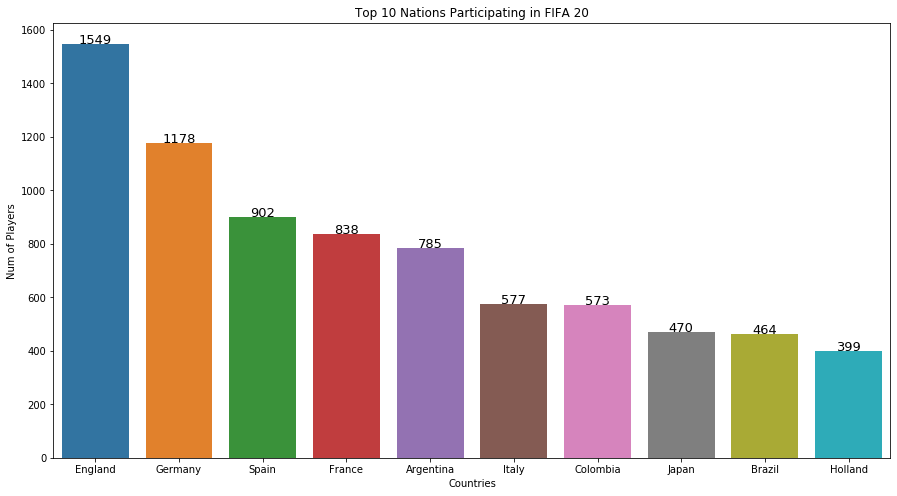

In [36]:
numplayers = fifa['Country'].value_counts().sort_values(ascending = False).head(10)
n = plt.figure(figsize=(15,8))
nx1 = n.add_subplot(111)

xvalue = numplayers.index
yvalue = numplayers.values
g = sns.barplot(xvalue, yvalue) 
plt.ylabel("Overall Rating")
plt.title('Top 10 Nations Participating in FIFA 20')
plt.xlabel('Countries')
plt.ylabel('Num of Players')

def barlabel(series):
    i = 0
    for index, row in series.items():
        g.text(i, row+1, round(row, 2), color='black', ha="center", fontsize = 13)
        i = i + 1
    return i
barlabel(numplayers)

Below is the distribution of top 10 participating country. Brazil has the highest mean overall rating, while Japan has the lowest mean overall rating. However, Germany has the largest distrubtion as you can see many outliers.

Text(0.5, 1.0, 'Distribution of Overall Rating of Players from Top 10 Countries')

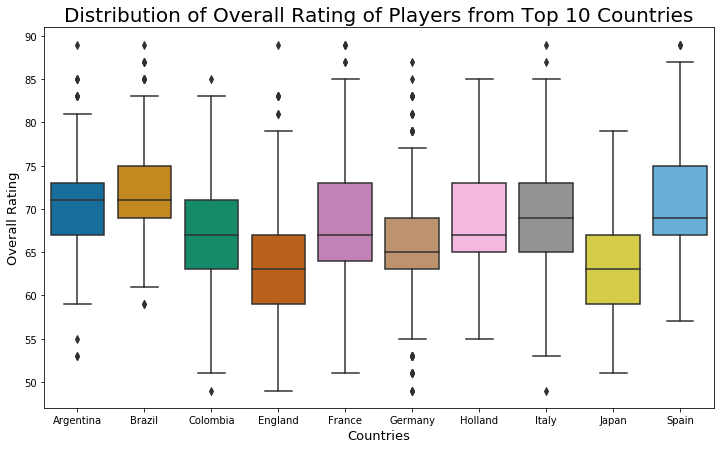

In [37]:
# Top contries overall rating distribution
some_countries = ('England', 'Germany', 'Spain', 'France', 'Argentina', 'Italy', 'Colombia', 'Japan', 'Brazil', 'Holland')
df_countries = fifa.loc[fifa['Country'].isin(some_countries) & fifa['Overall Rating']].sort_values(by = 'Country', ascending = True)

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.boxplot(x = df_countries['Country'], y = df_countries['Overall Rating'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 13)
ax.set_ylabel(ylabel = 'Overall Rating', fontsize = 13)
ax.set_title(label = 'Distribution of Overall Rating of Players from Top 10 Countries', fontsize = 20)

The bar graph below reveals the average overall rating of the top 10 countries. Brazil having the highest average overall rating does not necessarily mean the have the best players.

10

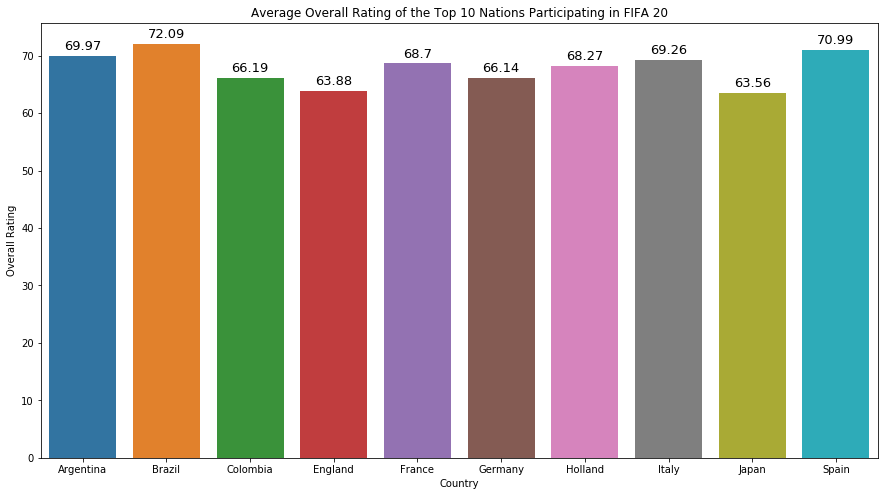

In [38]:
by_country = fifa[fifa.Country.isin(some_countries)==True]
by_country = by_country.groupby('Country')['Overall Rating'].mean()
by_country.sort_values(ascending = True).head(10)
b = plt.figure(figsize=(15,8))
bx1 = b.add_subplot(111)

xvalue = by_country.index
yvalue = by_country.values
g = sns.barplot(xvalue, yvalue) 
b = plt.ylabel("Overall Rating")
plt.title('Average Overall Rating of the Top 10 Nations Participating in FIFA 20')
barlabel(by_country)

**Comparsion of 2 Players**
<br>
User can enter or select 2 players to compare. The pie chart allows a side by side comparsion of each skill Rating between 2 players. The default players selected are the top 2 players, Lionel Messi and Ronaldo.

In [39]:
data = fifa[['Name','Pace', 'Shooting','Passing', 'Dribbling', 'Defending', 'Physicality']]
HeatmapData = data.groupby('Name').mean()
labels = np.array(HeatmapData.columns.values)
N = len(labels)

angles2 = []
for i in range(N):
    ang = 90 + i*180/np.pi
    if ang > 360:
        ang = abs(360 - ang)
    angles2.append(ang)
angles2.sort()
angles = [ math.radians(i) for i in angles2]

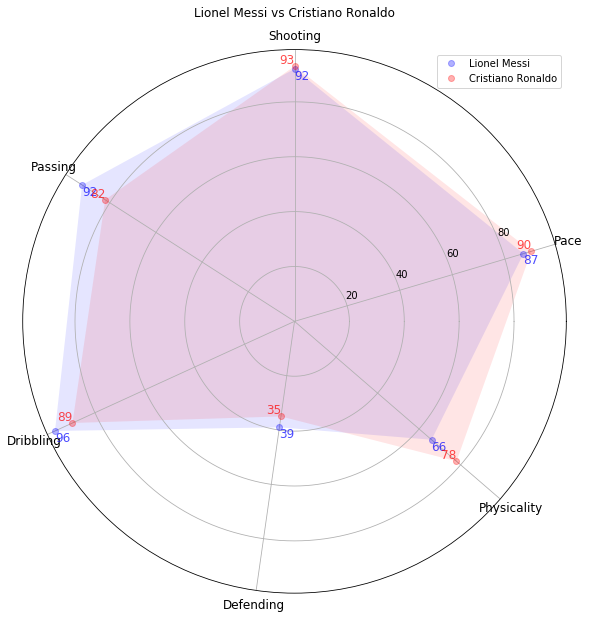

In [40]:
name = fifa.Name.tolist()[0]
name2 = fifa.Name.tolist()[1]
stats = HeatmapData.loc[name, labels]

fig1 = plt.figure(figsize=(12,10))
ax1 = fig1.add_subplot(111, polar=True)
ax1.plot(angles, stats, 'bo', linewidth=1,alpha=0.3)
ax1.fill(angles, stats, 'b', alpha=0.1)
stats2=HeatmapData.loc[name2,labels]
ax1.plot(angles, stats2, 'ro', linewidth=1,alpha=0.3)
ax1.fill(angles, stats2, 'r', alpha=0.1)
ax1.set_thetagrids(angles2, labels, fontsize=12)
ax1.set_title(name + " vs " + name2)
ax1.set_label('Label via method')
for i in range(N):
    ax1.text(angles[i], stats[i], str(int(stats[i])),color='blue', alpha=0.7,fontsize=12,verticalalignment='top', horizontalalignment='left',)
    ax1.text(angles[i], stats2[i], str(int(stats2[i])),color='red', alpha=0.7,fontsize=12,verticalalignment='bottom', horizontalalignment='right')
ax1.legend([name, name2], loc=1)
ax1.grid(True)

**Positions**
<br>
There are a total of 17 positions in FIFA 20. The most common positions are Center Back (CB), Striker (ST), and Central Midfielder (CM)

17

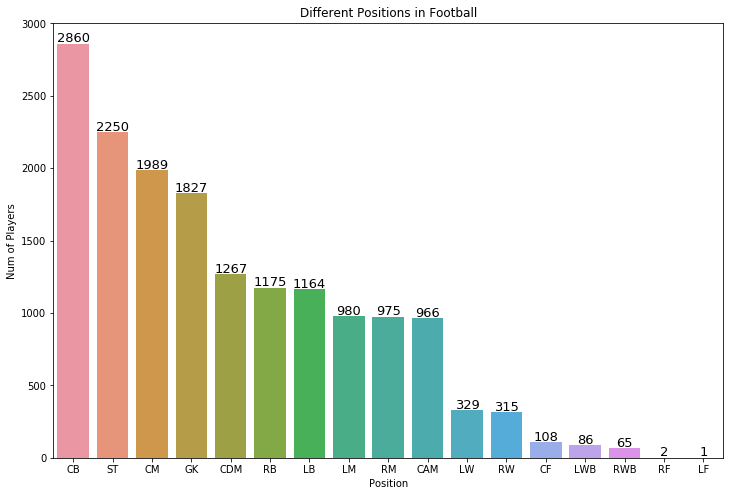

In [41]:
fig = plt.figure(figsize = (12, 8))
count_positions = fifa.groupby('Position')['Overall Rating'].count().reset_index(name='Overall Rating').sort_values(['Overall Rating'], ascending=False)                

xvalue = count_positions['Position']
yvalue = count_positions['Overall Rating']

c = sns.barplot(xvalue, yvalue) 
p = plt.ylabel("Num of Players")

plt.title('Different Positions in Football')

def barlabelpandas(pandas):
    i = 0
    for index, row in pandas.iteritems():
        c.text(i, row+10, round(row, 2), color='black', ha="center", fontsize = 13)
        i = i + 1
    return i
barlabelpandas(count_positions['Overall Rating'])

4

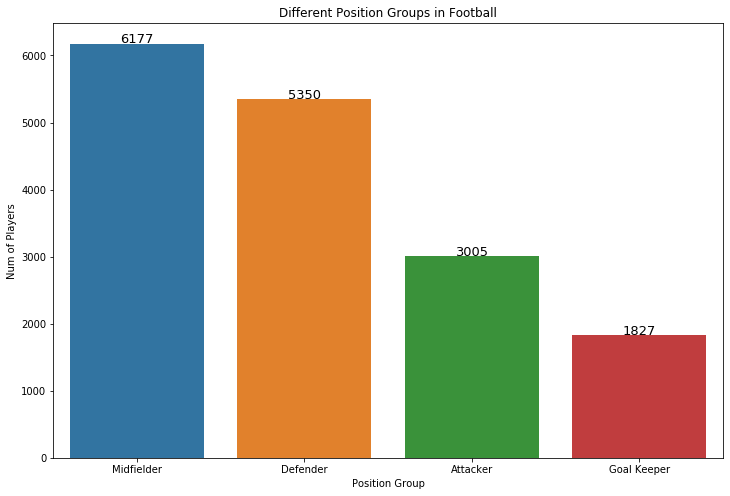

In [42]:
fig = plt.figure(figsize = (12, 8))
count_positions_groups = fifa.groupby('Position Group')['Overall Rating'].count().reset_index(name='Overall Rating').sort_values(['Overall Rating'], ascending=False)                

xvalue = count_positions_groups['Position Group']
yvalue = count_positions_groups['Overall Rating']

c = sns.barplot(xvalue, yvalue) 
p = plt.ylabel("Num of Players")

plt.title('Different Position Groups in Football')
barlabelpandas(count_positions_groups['Overall Rating'])

Below is the distribution of overall rating per positions for each continent. As the graph illustrates, South American has the highest rated players compared to other continents. While, Oceania and Asia have the lowest overall rating.

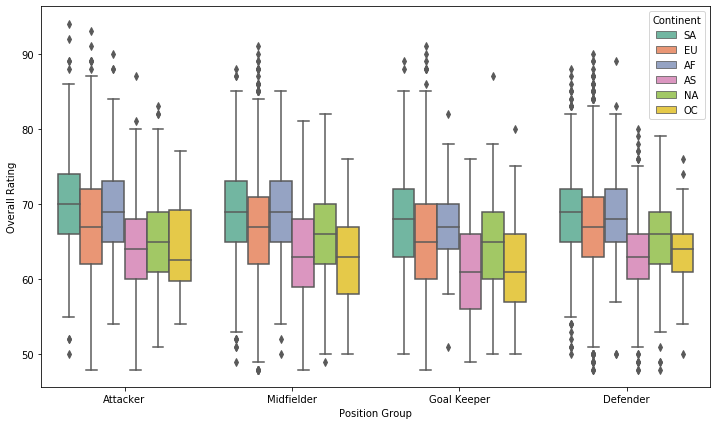

In [43]:
ax = sns.boxplot(x="Position Group", y="Overall Rating", hue="Continent", data=fifa, palette="Set2")

In [44]:
def bestplayers(df, formation, skill):
    # Each position group
    df_GK = df[df['Position Group'] == 'Goal Keeper']
    df_DD = df[df['Position Group'] == 'Defender']
    df_MD = df[df['Position Group'] == 'Midfielder']
    df_AK = df[df['Position Group'] == 'Attacker']
    
    # Number of Defenders, Midfielders, and Attackers
    i = int(formation[0])
    j = int(formation[1])
    k = int(formation[2])
    
    # Best Goalie, Defenders, Midfielders, and Attackers based on the formation and skill
    team = df_GK.nlargest(1, skill)
    team = team.append(df_DD.nlargest(i, skill))
    team = team.append(df_MD.nlargest(j, skill))
    team = team.append(df_AK.nlargest(k, skill))
    return team

def bestformation(df, formation, skill):
    # Formation selected
    formation2_value = formation

    # If formation is Any then pick the formation with the highest mean skill rating
    if formation2_value == 'Any':
        best_formation = [0,'formation']
        new_formation_list = ['442', '433', '451', '352']
        for i in new_formation_list:
            if bestplayers(df, i, skill)[skill].mean() > best_formation[0]:
                best_formation[0] = bestplayers(df, i, skill)[skill].mean()
                best_formation[1] = i
        best_formation = best_formation[1]
    else:
        best_formation = formation2_value
    
    # Return the best starting 11
    best = bestplayers(df, best_formation, skill)
    
    # Based on the formation define where to plot each player
    if best_formation == '442':
        best['X'] = [62.5, 25, 50, 75, 100, 25, 50, 75, 100, 41.7, 83.3]
        best['Y'] = [40, 60, 60, 60, 60, 85, 85, 85, 85, 110, 110]
    if best_formation == '433':
        best['X'] = [62.5, 25, 50, 75, 100, 31.3, 62.5, 93.75, 31.3, 62.5, 93.75]
        best['Y'] = [40, 60, 60, 60, 60, 85, 85, 85, 110, 110, 110]
    if best_formation == '451':
        best['X'] = [62.5, 25, 50, 75, 100, 20.8, 41.7, 62.5, 83.3, 104.2, 62.5]
        best['Y'] = [40, 60, 60, 60, 60, 85, 85, 85, 85, 85, 110]
    if best_formation == '352':
        best['X'] = [62.5, 31.3, 62.5, 93.75, 20.8, 41.7, 62.5, 83.3, 104.2, 41.7, 83.3]
        best['Y'] = [40, 60, 60, 60, 85, 85, 85, 85, 85, 110, 110]
        
    return best


Below are the top 5 national teams in the world. The best teams were determined by calculating the highest overall rating for a country regardless of the formation. As you can see Spain has the best team using the formation 4-5-1, while France, the second best team, using a 4-3-3 formation.

In [45]:
def top5countries():
    countries = numplayers.index.tolist()
    for j in range(0, 5):
        best_value = bestformation(fifa[fifa['Country'] == countries[0]], 'Any', 'Overall Rating')['Overall Rating'].mean()
        for i in range(0, len(countries)):
            players = bestformation(fifa[fifa['Country'] == countries[i]], 'Any', 'Overall Rating')
            team_rating = players['Overall Rating'].mean()
            if team_rating > best_value:
                best_value = team_rating
                best_team = countries[i]
                team_players = bestformation(fifa[fifa['Country'] == countries[i]], 'Any', 'Overall Rating')
                pop_location = i
        countries.remove(best_team)
        print('Number', j +1, ' Team', best_team, '\n', team_players[['Name', 'Country', 'Position Group']], '\n')
    return(j+1)
top5countries()

Number 1  Team Spain 
                 Name Country Position Group
11            De Gea   Spain    Goal Keeper
19      Sergio Ramos   Spain       Defender
29             Piqué   Spain       Defender
43        Jordi Alba   Spain       Defender
84          Carvajal   Spain       Defender
14   Sergio Busquets   Spain     Midfielder
26       David Silva   Spain     Midfielder
45            Thiago   Spain     Midfielder
66              Isco   Spain     Midfielder
72            Parejo   Spain     Midfielder
105       Iago Aspas   Spain       Attacker 

Number 2  Team France 
                   Name Country Position Group
33         Hugo Lloris  France    Goal Keeper
42     Aymeric Laporte  France       Defender
61       Samuel Umtiti  France       Defender
83      Raphaël Varane  France       Defender
101    Clément Lenglet  France       Defender
15        N'Golo Kanté  France     Midfielder
25          Paul Pogba  France     Midfielder
74      Blaise Matuidi  France     Midfielder
21       

5

**Top 4 skill set for each position**
<br>
Users need to be able to identify top skill set for each position. Having such information aids in the selection of players when creating a team or selecting what team to use. 

In [46]:
# defining the features of players
player_features = ('Pace', 'Shooting', 'Passing', 
                   'Dribbling', 'Defending', 'Physicality')

# Top five features for every position in football
for i, val in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Pace, Dribbling, Passing, Shooting
Position CB: Physicality, Defending, Pace, Dribbling
Position CDM: Physicality, Defending, Dribbling, Passing
Position CF: Pace, Dribbling, Shooting, Passing
Position CM: Dribbling, Pace, Physicality, Passing
Position GK: Dribbling, Pace, Physicality, Shooting
Position LB: Pace, Physicality, Dribbling, Defending
Position LF: Dribbling, Pace, Shooting, Physicality
Position LM: Pace, Dribbling, Passing, Shooting
Position LW: Pace, Dribbling, Shooting, Passing
Position LWB: Pace, Physicality, Dribbling, Defending
Position RB: Pace, Physicality, Dribbling, Defending
Position RF: Pace, Dribbling, Shooting, Passing
Position RM: Pace, Dribbling, Passing, Shooting
Position RW: Pace, Dribbling, Shooting, Passing
Position RWB: Pace, Physicality, Dribbling, Defending
Position ST: Pace, Physicality, Shooting, Dribbling


## Beyond the Original Specifications 
As soon as we formed the group, we have unanimously agreed that we will use the web-scrapping techniques to fetch our data. In the end, we were able to scrap more than 16,000 entries of current soccer player stats from the www.futbin.com website. In addition to web scrapping, we have cleaned up and augmented the data for our later applications. For example, we have to delete a few cases of entry redundancy, as certain players appeared more than once within our dataset. We were able to handle this issue by removing older versions of players and keeping the latest version of the player. We also implemented a continent map function using the pycountry package. This package allowed us to map each country to a continent using the alpha 2 code. To also defined each position into 4 major "Position Groups" for playing positions. Some of these changes are necessitated by our specific user stories, for example, we wanted to create a best continental team or selecting best team based on formation.
Some of changes are due to the fact that FIFA associations are not in 1 to 1 correlation with countries. In the end, we were albe to clean up and augment our web scrapped data for our later application. For details of our web scrapping, please refer to our python file: FIFADataWebscrapper.py  

The second important implementation was our graphical user interface. We first started this project aiming to learn information such as correlations between players' physical attributes and skill sets, or between playing positions and skill sets. We quickly realized that each one of us has different interests. The best way is for users to decide the types of information they want to learn. We learned that a Bokeh server can employed to achieve our goal. The initial implementation of Bokeh was carried out in MacBook, and we had the program successfully demoed live during our last class session. However, during additional testing, we later found out that some code cannot be run on windows. Our team was able to solve the issue and now our program can be run in both platforms, and users have total control about the types of correlations, starting 11 players, etc.    

We believe that we have used a number of unique queries and graphs for extracting and displaying our data. For example, we used fuzzy matching to manipulate the country code of the data entry, we use a pie chart to compare multiple skill sets between two players simultaneously. Additionally, our best starting 11 algorithm is able to display the best starting eleven based on formation, country, league, skill, or club. All in real time as the users updates their selction. This is the same for our scatter plot and histogram. In addition, all of our interactive graphs include a hoover tool tip that allows the users to hoover over a data point, player, or histogram bar and see more additionally display. Our aim with all of these extra tools was to provide the users with user friendly interactive tool that would respond and answer all of their questions.

The team also used github to keep track of all our python related files and unittests.
https://github.com/yte9pc/CS5010-Final-Project/tree/master


**Create Slider, MultiSelect, and Input for Scatter Plot**
<br>
Users have the ability to filter data to a certain player or range of overall rating or skill level. Or select multiple clubs, leagues, countries, or positions. Using this scatter plot users can idenitfy relationships between attributes or group of players.

In [47]:
player = AutocompleteInput(title="Player Name", completions=fifa.Name.tolist())
overall_rating = RangeSlider(title="Overall Rating", start=fifa['Overall Rating'].min(), end=fifa['Overall Rating'].max(), value=(fifa['Overall Rating'].min(), fifa['Overall Rating'].max()), step=1)
skill = RangeSlider(title="Skill", start=fifa['Skill'].min(), end=fifa['Skill'].max(), value=(fifa['Skill'].min(), fifa['Skill'].max()), step=1, default_size = 400)
club = MultiSelect(title="Clubs", options=fifa.sort_values('Club').Club.unique().tolist(), size =  10)
league = MultiSelect(title="Leagues", options=fifa.sort_values('League').League.unique().tolist(), size =  10)
country = MultiSelect(title="Countries", options=fifa.sort_values('Country').Country.unique().tolist(), size =  10)
position = MultiSelect(title="Positions", options=['CF', 'ST', 'RW', 'RF', 'LW', 'LF', 'RM', 'LM', 'CAM', 'CM', 'CDM', 'LB', 'LWB', 'RB', 'RWB', 'CB', 'GK'], size =  10)

**Create Scatter Plot and HTML Code for Interface**
<br>
Using columndata source to allow user to hover over datapoint to obtain additional information about each player.

In [48]:
axis_map = dict(zip(fifa.select_dtypes(include='int64').columns.values, fifa.select_dtypes(include='int64').columns.values))
x_axis = Select(title="X Axis", options=sorted(axis_map.keys()), value="Dribbling")
y_axis = Select(title="Y Axis", options=sorted(axis_map.keys()), value="Passing")

source = ColumnDataSource(data=dict(x=[], y=[], color=[], legend=[], player=[], overallrating=[], club=[], league=[], country = [], position=[]))
TOOLTIPS=[
    ("Player", "@player"),
    ("Overall Rating", "@overallrating"),
    ("Club", "@club"),
    ("League", "@league"),
    ("Country", "@country"),
    ("Position", "@position")
]
p = figure(plot_height=600, plot_width=700, tooltips=TOOLTIPS, sizing_mode="scale_both")

p.circle(x="x", y="y", source=source, size=10, color = "color", line_color='grey', hover_fill_color='black', 
         hover_alpha=0.5, legend="legend")

desc = Div(text="""<style>
h1 {
    margin: 1em 0 0 0;
    color: #2e484c;
    font-family: 'Julius Sans One', sans-serif;
    font-size: 1.8em;
    text-transform: uppercase;
}
a:link {
    font-weight: bold;
    text-decoration: none;
    color: #0d8ba1;
}
a:visited {
    font-weight: bold;
    text-decoration: none;
    color: #1a5952;
}
a:hover, a:focus, a:active {
    text-decoration: underline;
    color: #9685BA;
}
p {
    font: "Libre Baskerville", sans-serif;
    text-align: justify;
    text-justify: inter-word;
    width: 80%;
    max-width: 800;
}

</style>

<h1>An Interactive Explorer of FIFA 2020 Player Data</h1>

<p>
Interact with the widgets on the left to query a subset of players to plot.
Hover over the circles to see more information about each player.
</p>""",
sizing_mode="stretch_width")

### Select function updates the plot based on user selection

In [49]:
def select_fifa():
    # Stores the values selected by the user
    overall_rating_val = overall_rating.value
    skill_level = skill.value
    player_val = player.value
    league_val = league.value
    club_val = club.value
    country_val = country.value
    position_val = position.value
    
    # Filter FIFA data based on overall rating and skill
    selected = fifa[
        (fifa['Overall Rating'] >= overall_rating_val[0]) &
        (fifa['Overall Rating'] <= overall_rating_val[1]) &
        (fifa['Skill'] >= skill_level[0]) &
        (fifa['Skill'] <= skill_level[1])
    ]
    
    # Filter FIFA data if player name, league, club, or position is not null
    if (player_val != ""):
        selected = selected[selected.Name.str.contains(player.value)==True]
    if (len(league_val) != 0):
        selected = selected[selected.League.isin(league_val)==True]
    if (len(club_val) != 0):
        selected = selected[selected.Club.isin(club_val)==True]
    if (len(country_val) != 0):
        selected = selected[selected.Country.isin(country_val)==True]
    if (len(position_val) != 0):
        selected = selected[selected.Position.isin(position_val)==True]
    
    # Calculate 75th, 50th, and 25th percentile
    per75 = np.percentile(selected[y_axis.value], 75)
    per50 = np.percentile(selected[y_axis.value], 50)
    per25 = np.percentile(selected[y_axis.value], 25)
    
    # Color each player based on percentile group
    selected["color"] = np.where(selected[y_axis.value] > per50, np.where(selected[y_axis.value] > per75,'#29788E', '#79D151'), np.where(selected[y_axis.value] < per25, '#8C2980', '#FD9F6C') ) 
    # Create legend
    selected["legend"] = np.where(selected[y_axis.value] > per50, np.where(selected[y_axis.value] > per75,'Top 25th Percentile', '75th Percentile'), np.where(selected[y_axis.value] < per25, 'Bottom 25th Percentile', '50th Percentile') )
    return selected

### Update function calls select_fifa() function to update plot automatically

In [50]:
def update():
    # Retrieve the subset of data to plot
    df = select_fifa()

    # X and Y axis value selected by the user
    #x_name = axis_map.get(x_axis.value)
    #y_name = axis_map.get(y_axis.value)
    x_name = x_axis.value
    y_name = y_axis.value

    # Labels
    p.xaxis.axis_label = x_axis.value
    p.yaxis.axis_label = y_axis.value
    p.xaxis.axis_label_text_font_size = "14pt"
    p.yaxis.axis_label_text_font_size = "14pt"
    p.xaxis.major_label_text_font_size = "12pt"
    p.yaxis.major_label_text_font_size = "12pt"
    
    # Title text
    p.title.text = str(len(df)) + " Players selected                                                              " + x_axis.value + ' vs ' + y_axis.value
    p.title.text_font_size = '16pt'
    
    # Legend position
    p.legend.location = "top_left"
    
    # Source data for scatter plot
    source.data = dict(
        x=df[x_name],
        y=df[y_name],
        color=df["color"],
        legend=df["legend"],
        player=df["Name"],
        club=df["Club"], 
        league=df["League"], 
        position=df["Position"], 
        country=df['Country'],
        overallrating=df["Overall Rating"],
    )

# Check if the user input has changed
controls = [player, overall_rating, skill, league, club, country, position, x_axis, y_axis]
for control in controls:
    control.on_change('value', lambda attr, old, new: update())

# Layout of first tab
inputs = column(*controls, width=350, height=1000)
inputs.sizing_mode = "fixed"
l = layout([
    [desc],
    [inputs, p],
], sizing_mode="scale_both")

###  Create Select for Histogram

In [51]:
# X axis that user can select from
hist_x_axis = ['Skill', 'Weak Foot', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality', 'Height']

club3 = Select(title="Clubs", value = 'Any', options=['Any'] + fifa.sort_values('Club').Club.unique().tolist())
league3 = Select(title="Leagues", value = 'Any', options=['Any'] + fifa.sort_values('League').League.unique().tolist())
country3 = Select(title="Countries", value = 'Any', options=['Any'] + fifa.sort_values('Country').Country.unique().tolist())
position3 = Select(title="Position Groups", value = 'Any', options=['Any'] + fifa.sort_values('Position Group')['Position Group'].unique().tolist())
skills3 = Select(title="Skills", value = 'Passing', options=hist_x_axis)

### Create Histogram and html code for describing the interface

In [52]:
arr_src = ColumnDataSource(data=dict(count=[],left=[], right=[], f_count=[], f_interval=[]))

p3 = figure(plot_height=700, plot_width=1200, sizing_mode="scale_both",
                background_fill_color="#fafafa")

p3.quad(bottom=0, 
           top='count', 
           left='left', 
           right='right', 
           source=arr_src,
           hover_fill_alpha=0.5,
           hover_fill_color='grey',
           fill_color="orange", 
           line_color="black", 
            alpha=0.7)

# Title
p3.title.align = 'center'
p3.title.text = "Histogram of " + skills3.value + " Rating"

# Axis labels
p3.xaxis.axis_label = skills3.value + " Rating"
p3.yaxis.axis_label = "Number of Players"
p3.title.text_font_size = '16pt'
p3.xaxis.axis_label_text_font_size = "14pt"
p3.yaxis.axis_label_text_font_size = "14pt"
p3.xaxis.major_label_text_font_size = "12pt"
p3.yaxis.major_label_text_font_size = "12pt"

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [(skills3.value, '@f_interval'),
                                  ('Count', '@f_count')])

# Add the hover tool to the graph
p3.add_tools(hover)

desc3 = Div(text="""<style>
h1 {
    margin: 1em 0 0 0;
    color: #2e484c;
    font-family: 'Julius Sans One', sans-serif;
    font-size: 1.8em;
    text-transform: uppercase;
}
a:link {
    font-weight: bold;
    text-decoration: none;
    color: #0d8ba1;
}
a:visited {
    font-weight: bold;
    text-decoration: none;
    color: #1a5952;
}
a:hover, a:focus, a:active {
    text-decoration: underline;
    color: #9685BA;
}
p {
    font: "Libre Baskerville", sans-serif;
    text-align: justify;
    text-justify: inter-word;
    width: 80%;
    max-width: 800;
}

</style>

<h1>An Interactive Explorer of FIFA 2020 Player Data</h1>

<p>
Interact with the widgets below to explore the distribution of players' skill.
</p>""",
sizing_mode="stretch_width")

### Select function updates the histogram based on user selection

In [53]:
def select_hist():
    # Stores the values selected by the user
    club3_val = club3.value
    league3_val = league3.value
    country3_val = country3.value
    position3_val = position3.value
    skills3_val = skills3.value
    
    selected = fifa
    
    # Filter FIFA data if league, club, country, or position is not null
    if (club3_val != 'Any'):
        selected = selected[selected.Club == club3_val]
    if (league3_val != 'Any'):
        selected = selected[selected.League == league3_val]
    if (country3_val != 'Any'):
        selected = selected[selected.Country == country3_val]
    if (position3_val != 'Any'):
        selected = selected[selected['Position Group'] == position3_val]
    
    return selected, skills3_val

### Update function calls select_hist() function to update histogram automatically

In [54]:
def update3():
    # Retrieve the subset of data to use
    df, skill = select_hist()
    arr_hist, edges = np.histogram(df[skill], density=False, bins='auto')

    # Column data source
    arr_df = pd.DataFrame({'count': arr_hist, 'left': edges[:-1], 'right': edges[1:]})
    arr_df['f_count'] = ['%d' % count for count in arr_df['count']]
    arr_df['f_interval'] = ['%d to %d ' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]
    
    # Update Title and X-axis
    p3.title.text = "Histogram of " + skill + " Rating"
    p3.xaxis.axis_label = skill + " Rating"
    
    # Add a hover tool referring to the formatted columns
    hover = HoverTool(tooltips = [(skill, '@f_interval'),
                                  ('Count', '@f_count')])
    # Add the hover tool to the graph
    p3.add_tools(hover)
    
    # Source data for Histogram
    arr_src.data = dict(count=arr_df['count'],
                        left=arr_df['left'], 
                        right=arr_df['right'], 
                        f_count=arr_df['f_count'], 
                        f_interval=arr_df['f_interval'],) 

# Check if the user input has changed    
controls3 = [club3, league3, country3, position3, skills3]

for control in controls3:
    control.on_change('value', lambda attr, old, new: update3())

# Layout of second tab
inputs3 = row(*controls3)
inputs3.sizing_mode = "fixed"
l3 = column(row(desc3),row(club3, league3, country3, position3,skills3),row(p3))

### Best Starting 11

In [55]:
# Formation to select from
formation_list = ['Any','442', '433', '451', '352']

# Remove countries without enough players
countrylist = fifa.groupby('Country')
minplayers = countrylist.filter(lambda x: x['Overall Rating'].count() > 18)

# Skill set
best_x_axis = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Overall Rating']

### Create Select and MultiSelect

In [56]:
skills2 = Select(title="Skills", value = 'Overall Rating', options=best_x_axis)
formation = Select(title="Formation", value = 'Any', options=formation_list)
club2 = MultiSelect(title="Clubs", options=fifa.sort_values('Club').Club.unique().tolist(), size =  10)
league2 = MultiSelect(title="Leagues", options=fifa.sort_values('League').League.unique().tolist(), size =  10)
country2 = MultiSelect(title="Countries", options=minplayers.sort_values('Country').Country.unique().tolist(), size =  10)
continent = MultiSelect(title="Continent", options=fifa.sort_values('Continent').Continent.unique().tolist(), size = 6)

### Create Plot of Best Starting 11 and html code for describing the interface

In [57]:
source2 = ColumnDataSource(data=dict(x=[], y=[], color=[], legend=[], player=[], club=[], league=[], 
                                   country = [], continent= [], overallrating=[], pace=[], shooting=[],
                                   passing=[], dribbling=[], defending=[], physicality=[]))
TOOLTIPS2=[
    ("Player", '@player'),
    ("Club", "@club"),
    ("League", "@league"),
    ("Country", "@country"),
    ("Continent", "@continent"),
    ("Overall Rating", "@overallrating"),
    ("Pace", "@pace"),
    ("Shooting", "@shooting"),
    ("Passing", "@passing"),
    ("Dribbling", "@dribbling"),
    ("Defending", "@defending"),
    ("Physicality", "@physicality")
]
p2 = figure(plot_height=900, plot_width=1000, tooltips=TOOLTIPS2, sizing_mode="scale_both", x_range=(5, 130))
p2.circle(x="x", y="y", source=source2, size=75, color = "color", line_color='grey', hover_fill_color='black', 
         hover_alpha=0.5, legend="legend")

desc2 = Div(text="""<style>
h1 {
    margin: 1em 0 0 0;
    color: #2e484c;
    font-family: 'Julius Sans One', sans-serif;
    font-size: 1.8em;
    text-transform: uppercase;
}
a:link {
    font-weight: bold;
    text-decoration: none;
    color: #0d8ba1;
}
a:visited {
    font-weight: bold;
    text-decoration: none;
    color: #1a5952;
}
a:hover, a:focus, a:active {
    text-decoration: underline;
    color: #9685BA;
}
p {
    font: "Libre Baskerville", sans-serif;
    text-align: justify;
    text-justify: inter-word;
    width: 80%;
    max-width: 800;
}

</style>

<h1>An Interactive Explorer of FIFA 2020 Player Data</h1>

<p>
Interact with the widgets on the left to discover the best starting 11 players.
Hover over the circles to see more information about each player.
</p>""",
sizing_mode="stretch_width")

### Algorithm for selecting players based on formation and skill

In [58]:
def bestplayers(df, formation, skill):
    # Each position group
    df_GK = df[df['Position Group'] == 'Goal Keeper']
    df_DD = df[df['Position Group'] == 'Defender']
    df_MD = df[df['Position Group'] == 'Midfielder']
    df_AK = df[df['Position Group'] == 'Attacker']
    
    # Number of Defenders, Midfielders, and Attackers
    i = int(formation[0])
    j = int(formation[1])
    k = int(formation[2])
    
    # Best Goalie, Defenders, Midfielders, and Attackers based on the formation and skill
    team = df_GK.nlargest(1, skill)
    team = team.append(df_DD.nlargest(i, skill))
    team = team.append(df_MD.nlargest(j, skill))
    team = team.append(df_AK.nlargest(k, skill))
    return team

### Algorithm for selecting any formation and graphing location of players on the field

In [59]:
def bestformation(df, formation, skill):
    # Formation selected
    formation2_value = formation

    # If formation is Any then pick the formation with the highest mean skill rating
    if formation2_value == 'Any':
        best_formation = [0,'formation']
        new_formation_list = ['442', '433', '451', '352']
        for i in new_formation_list:
            if bestplayers(df, i, skill)[skill].mean() > best_formation[0]:
                best_formation[0] = bestplayers(df, i, skill)[skill].mean()
                best_formation[1] = i
        best_formation = best_formation[1]
    else:
        best_formation = formation2_value
    
    # Return the best starting 11
    best = bestplayers(df, best_formation, skill)
    
    # Based on the formation define where to plot each player
    if best_formation == '442':
        best['X'] = [62.5, 25, 50, 75, 100, 25, 50, 75, 100, 41.7, 83.3]
        best['Y'] = [40, 60, 60, 60, 60, 85, 85, 85, 85, 110, 110]
    if best_formation == '433':
        best['X'] = [62.5, 25, 50, 75, 100, 31.3, 62.5, 93.75, 31.3, 62.5, 93.75]
        best['Y'] = [40, 60, 60, 60, 60, 85, 85, 85, 110, 110, 110]
    if best_formation == '451':
        best['X'] = [62.5, 25, 50, 75, 100, 20.8, 41.7, 62.5, 83.3, 104.2, 62.5]
        best['Y'] = [40, 60, 60, 60, 60, 85, 85, 85, 85, 85, 110]
    if best_formation == '352':
        best['X'] = [62.5, 31.3, 62.5, 93.75, 20.8, 41.7, 62.5, 83.3, 104.2, 41.7, 83.3]
        best['Y'] = [40, 60, 60, 60, 85, 85, 85, 85, 85, 110, 110]
        
    return best

### Select function updates the best starting 11 based on user selection

In [60]:
def select_fifa2():
    formation_val = formation.value
    club_val = club2.value
    league_val = league2.value
    country_val = country2.value
    continent_val = continent.value
    
    selected = fifa
    if (len(league_val) != 0):
        selected = selected[selected.League.isin(league_val)==True]
    if (len(club_val) != 0):
        selected = selected[selected.Club.isin(club_val)==True]
    if (len(country_val) != 0):
        selected = selected[selected.Country.isin(country_val)==True]
    if (len(continent_val) != 0):
        selected = selected[selected.Continent.isin(continent_val)==True]
        
    selected = bestformation(selected, formation_val, skills2.value)
    
    # Color code each position group
    color = []
    for column in selected['Position Group']:
        if column == 'Goal Keeper':
            color.append('#29788E')
        if column == 'Defender':
            color.append('#79D151')    
        if column == 'Midfielder':
            color.append('#8C2980')
        if column == 'Attacker':
            color.append('#FD9F6C')
    selected["color"] = color
    # Legend
    selected["legend"] = selected['Position Group']
    return selected

### Update function for best starting 11 when user changes selection

In [61]:
def update2():
    df = select_fifa2()
    
    # No x and y axis
    p2.xgrid.grid_line_color = None
    p2.ygrid.grid_line_color = None
    # Title
    p2.title.text = "Best Starting 11 Based on " + formation.value + " Formation & " + skills2.value
    p2.title.text_font_size = '16pt'
    # Legend
    p2.legend.location = "top_right"
    p2.axis.visible = False
    
    # Source data for plot
    source2.data = dict(
        x=df['X'],
        y=df['Y'],
        color=df["color"],
        legend=df["legend"],
        player=df["Name"],
        club=df["Club"], 
        league=df["League"], 
        country=df["Country"],
        continent=df["Continent"],
        overallrating=df['Overall Rating'],
        pace=df["Pace"],
        shooting=df["Shooting"],
        passing=df["Passing"],
        dribbling=df["Dribbling"],
        defending=df["Defending"],
        physicality=df["Physicality"],
    )

# Check if the user input has changed       
controls2 = [club2, league2, country2, continent, skills2, formation]
for control in controls2:
    control.on_change('value', lambda attr, old, new: update2())

# Layout of third tab
inputs2 = column(club2, league2, country2, continent, width=320, height=850)
inputs2.sizing_mode = "fixed"
l2 = column(row(desc2),row(inputs2, p2, column(formation, skills2)))

In [62]:
# Create a panel for each tab
first_tab = Panel(child = l, title = 'Scatter Plot')
second_tab = Panel(child = l3, title = 'Histogram of Players Skill')
third_tab = Panel(child = l2, title = 'Best Starting 11')
tabs = Tabs(tabs =[first_tab, second_tab, third_tab])

# initial load of the data
update()
update2()
update3()
curdoc().add_root(tabs)
curdoc().title = "FIFA 2020 Players"

## Testing
We started testing with unittest as we developed our functions. In total we have 21 unittests for our all of  our functions. With each function being tested at least once, while may being tested multiple tests. For example, for our web scrapping part, we tested that we can reach the website, that the data was scrapped in the correct format and the csv was written. We also have unittests for our support functions such as our country to continent convert and positional group function. We also insured to test all of user select functions, and functions that determined the best starting eleven. In all, all of unittest returned as success for our final program.

Additionally, we tested the portability of our program. As we have alluded to earlier, our program was first implemented heavily on a MacBook. After some struggles, we fulfilled at least one non-functional requirement -- portability. Now, our program runs on both Mac and Windows. 

## Conclusion
We were able to successfully web scrap data from the www.futbin.com website. We cleaned and augmented the data, extracted information, and finally turned these data into knowledge for all of our users. A video gamer can use our program to customize his or her soccer team based on different criteria. A FIFA World Cup soccer fan can simulate which national team will win the next World Cup. An EA developer can understand the variation of players skill stats using our scatter plot. We, as part of this team, cherished the opportunity in work in scrum environment. Together we were able to create a project that we are all proud of. 

## Improvements
Some improvements we could make to our project is including historical data of FIFA players for past versions of FIFA. This would allow us to analysis players' skills trends overtime. We could also incorporate a predictive ML model using neural network to predict future player ratings. This would be useful for users such as video gamers and developers. As this would allow them to see a prediction of players in the next years FIFA video game. Futuremore, allowing users to build a team by dragging players from a bin and provding analysis such as chemistry and team strength would be helpful knowledge. Finally, allowing a drill down from the best starting 11 to individual player would be a helpful feature.

## References
1. https://www.futbin.com/
2. https://www.crummy.com/software/BeautifulSoup/bs4/doc/
3. http://docs.bokeh.org/en/1.3.2/docs/user_guide/server.html
